# 21BCE5676 - IMPLEMENTATION OF MULTIPLE REGRESSION

# Regression Analysis

Regression analysis is a statistical technique that helps us understand the relationship between a dependent variable (the one we're trying to predict or explain) and one or more independent variables (the ones we think might influence the dependent variable). It's like trying to find the best-fitting line or curve that goes through a bunch of data points.

For example: Imagine a real estate agent is trying to figure out what factors affect the price of house. Here regression analysic can be usedto see how things like the number of bedrooms, the size of the lot, and the distance to the nearest school correlate with the sale price of houses.

Some of the different types of regression analysis are:

1)Linear regression: This is the most common type of regression analysis, and it assumes that the relationship between the independent and dependent variables is linear (i.e., a straight line).

2)Multiple linear regression: This is similar to linear regression, but it allows you to include more than one independent variable in your model.


# Linear Regression

Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between a dependent variable and one or more independent features.


It is represented by an equation Y=a+b*X + e, where a is intercept, b is slope of the line and e is error term. This equation can be used to predict the value of target variable based on given predictor variable(s).

Thus, linear regression simulates a mathematical relationship between variables and makes predictions for continuous or numeric variables such as sales, salary, age, product price, etc.

In [329]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# this allows plots to appear directly in the notebook
%matplotlib inline

# Dataset Description

Humans have greatly associated themselves with Songs & Music. It can improve mood, decrease pain and anxiety, and facilitate opportunities for emotional expression. Research suggests that music can benefit our physical and mental health in numerous ways.

Lately, multiple studies have been carried out to understand songs & it's popularity based on certain factors. Such song samples are broken down & their parameters are recorded to tabulate. Uisng all the provided data we will try to predict the Song's Popularity and understand the factors influencing it and to what measure.

The parameters of this dataset are-

1)Song Name
2)Song Popluarity index
3)Song duration 
4)Measure of Danceability of the song
5)Measure of energy of the song
7)Measure of instrumentalness of the song
8)Liveness of the song
9)Loudness
10)Audio mode etc

In [330]:
# read data into a DataFrame
data = pd.read_csv('song_data.csv')
data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


The Datset consists of 14 features(3-categorial and 10 numerical features) & 18835 samples.

In [331]:
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


# Exploratory Analytics

In [332]:
#dropping null values if any
mdata =data.dropna()

In [333]:
#cross checking for null values
mdata.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

Inference: All the null values havve been succesfully removed

In [334]:
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [335]:
#analysing features of the data
data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [336]:
#Removing unwanted columns
data=data.drop(['time_signature','audio_mode','speechiness','audio_valence','key','acousticness','tempo','loudness'],axis=1)
data

,song_name,song_popularity,song_duration_ms,danceability,energy,instrumentalness,liveness
0,Boulevard of Broken Dreams,73,262333,0.496,0.682,0.000029,0.0589
1,In The End,66,216933,0.542,0.853,0.000000,0.1080
2,Seven Nation Army,76,231733,0.737,0.463,0.447000,0.2550
3,By The Way,74,216933,0.451,0.970,0.003550,0.1020
4,How You Remind Me,56,223826,0.447,0.766,0.000000,0.1130
...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.500,0.151,0.000065,0.1110
18831,Answers,60,205666,0.495,0.161,0.000001,0.1050
18832,Sudden Love (Acoustic),23,182211,0.719,0.325,0.000000,0.1250
18833,Gentle on My Mind,55,352280,0.488,0.326,0.015700,0.1190


In [337]:
#reducing the size of dataset
data=data.head(1000)

In [338]:
data

,song_name,song_popularity,song_duration_ms,danceability,energy,instrumentalness,liveness
0,Boulevard of Broken Dreams,73,262333,0.496,0.682,0.000029,0.0589
1,In The End,66,216933,0.542,0.853,0.000000,0.1080
2,Seven Nation Army,76,231733,0.737,0.463,0.447000,0.2550
3,By The Way,74,216933,0.451,0.970,0.003550,0.1020
4,How You Remind Me,56,223826,0.447,0.766,0.000000,0.1130
...,...,...,...,...,...,...,...
995,One Headlight,72,312587,0.701,0.564,0.002770,0.0657
996,Hey Jealousy,63,236066,0.464,0.785,0.000001,0.3280
997,I'm Gonna Be (500 Miles),77,219466,0.851,0.551,0.000000,0.0827
998,Good,63,185093,0.615,0.657,0.020400,0.1320


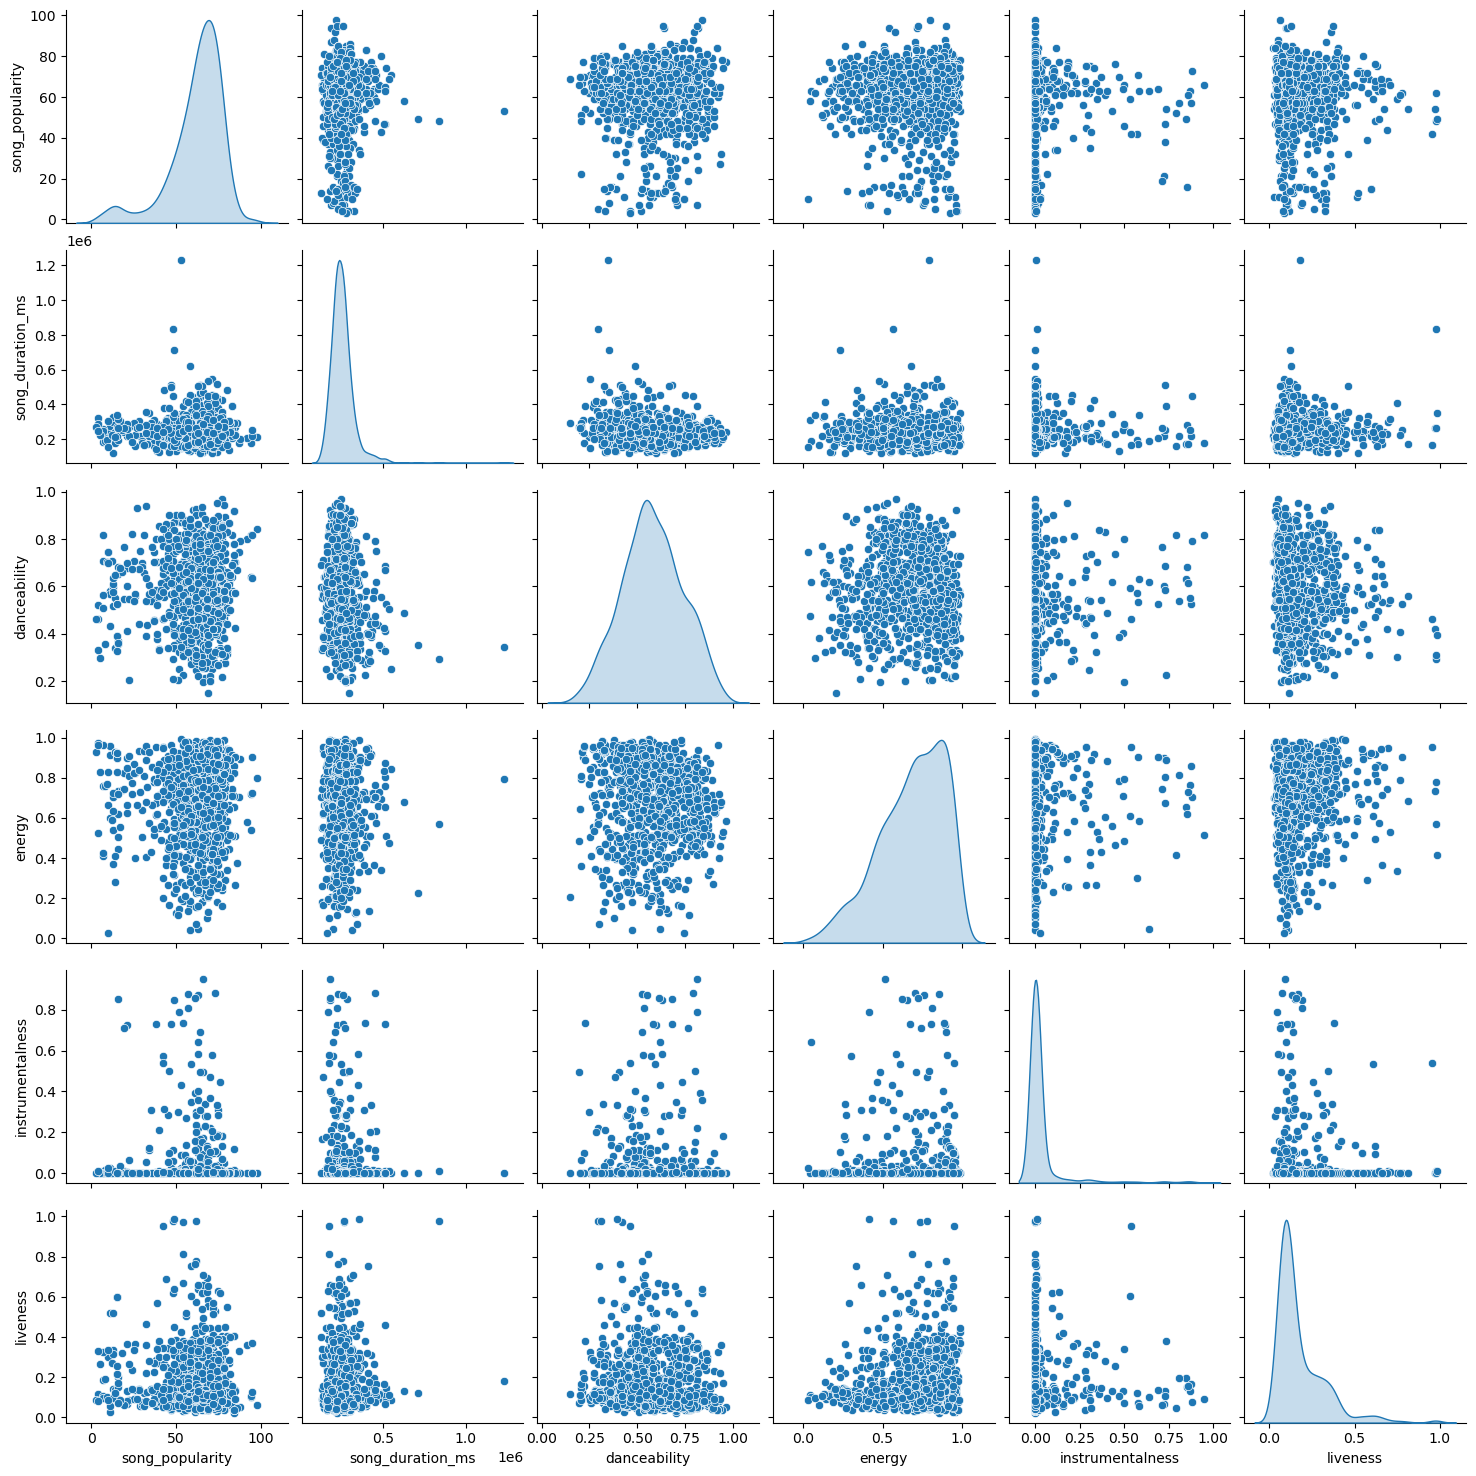

In [339]:
#Plot of features against each other
import seaborn as sns
sns.pairplot(data,diag_kind='kde')

In [342]:
data.corr()

C:\Users\Sireesha\AppData\Local\Temp\ipykernel_1716\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,song_popularity,song_duration_ms,danceability,energy,instrumentalness,liveness
song_popularity,1.000000,-0.007904,0.017494,0.013646,-0.074584,-0.067502
song_duration_ms,-0.007904,1.000000,-0.166141,-0.042037,0.017266,0.022415
danceability,0.017494,-0.166141,1.000000,-0.053512,-0.002755,-0.110775
energy,0.013646,-0.042037,-0.053512,1.000000,-0.004223,0.157677
instrumentalness,-0.074584,0.017266,-0.002755,-0.004223,1.000000,0.000160
liveness,-0.067502,0.022415,-0.110775,0.157677,0.000160,1.000000


C:\Users\Sireesha\AppData\Local\Temp\ipykernel_1716\216060684.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

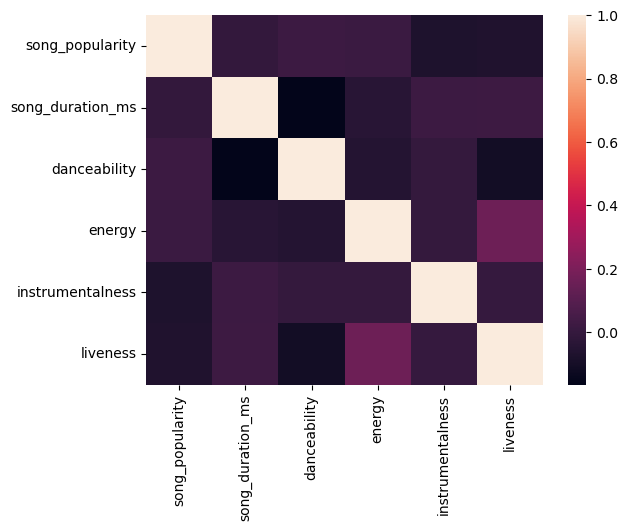

In [343]:
import seaborn as sns
sns.heatmap(data.corr())

Here we can observe independent variables to be:

1)song_duration_ms
2)danceability
3)energy
4)instrumentalness
5)liveness

Dependent variable or response is song_popularity.

In [344]:
data.shape

(1000, 7)

<Axes: xlabel='liveness', ylabel='song_popularity'>

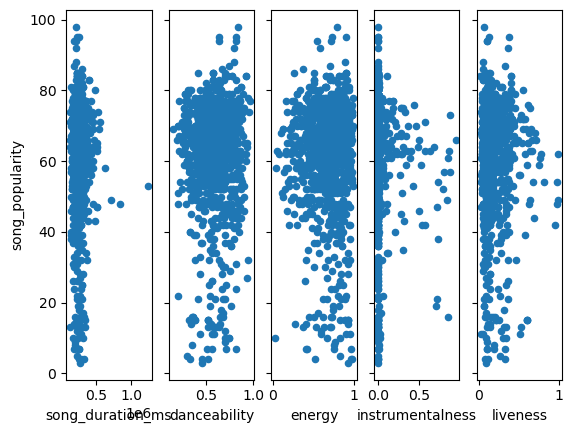

In [279]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, sharey=True)
data.plot(kind='scatter', x='song_duration_ms', y='song_popularity', ax=axs[0])
data.plot(kind='scatter', x='danceability', y='song_popularity', ax=axs[1])
data.plot(kind='scatter', x='energy', y='song_popularity', ax=axs[2])
data.plot(kind='scatter', x='instrumentalness', y='song_popularity', ax=axs[3])
data.plot(kind='scatter', x='liveness', y='song_popularity', ax=axs[4])

# Questions about the data or Objectives

Is there a relationship between song popularity and danceability?
How strong is that relationship?
Is there a relationship between dancebility,energy,liveness and popularity?
Given these independent variables, can popularity be predicted?

#   Methodology-

The dataset is fairly small and has been filtered to remove null values. So we can go ahead and apply Simple Linear regression and Multiple Linear regression to predict the popularity of the songs. Under Simple Linear regression we will analyse how each feature affects the prediction and then see how we can combine these features, drop one or more of them to get fine tuned model in Multiple linear regression. For comparing models of simple linear regression hypothesis testing with p-values will be followed. On the ather hand for multiple linear regression we will calculate values of  R-Square,MSE,MAE and RMSE.

# Simple regression

Simple linear regression is a statistical method used to model the relationship between two variables, where one variable is considered to be the independent variable and the other is the dependent variable. In simple linear regression, it is assumed that the relationship between the two variables can be approximated by a straight line.

The goal of simple linear regression is to find the best-fitting linear equation that describes the relationship between the independent variable (often denoted as "x") and the dependent variable (often denoted as "y"). The equation for a simple linear regression model is typically represented as:

y = β0 + β1x + ε

Where:
- y is the dependent variable
- x is the independent variable
- β0 is the y-intercept (constant)
- β1 is the slope of the line (the coefficient of x)
- ε represents the error term, which accounts for the variability in y that is not explained by the linear relationship with x

The coefficients β0 and β1 are estimated from the data using a method such as the method of least squares, which aims to minimize the sum of the squared differences between the observed values of y and the values predicted by the linear equation.

Once the coefficients are estimated, they can be used to predict the value of the dependent variable for a given value of the independent variable, and to assess the strength and direction of the relationship between the two variables.




 To estimate these model coefficients we will use __least squares criterion__ 
 
 The least-square method states that the curve that best fits a given set of observations, is said to be a curve having a minimum sum of the squared residuals (or deviations or errors) from the given data points. Let us assume that the given points of data are (x1, y1), (x2, y2), (x3, y3), …, (xn, yn) in which all x’s are independent variables, while all y’s are dependent ones. Also, suppose that f(x) is the fitting curve and d represents error or deviation from each given point.

Now, we can write:

d1 = y1 − f(x1)

d2 = y2 − f(x2)

d3 = y3 − f(x3)

…..

dn = yn – f(xn)

The least-squares explain that the curve that best fits is represented by the property that the sum of squares of all the deviations from given values must be minimum, i.e:

Sum = Minimum Quantity

Suppose when we have to determine the equation of line of best fit for the given data, then we first use the following formula.

The equation of least square line is given by Y = a + bX

Normal equation for ‘a’: 

∑Y = na + b∑X

Normal equation for ‘b’: 

∑XY = a∑X + b∑X2

Solving these two normal equations we can get the required trend line equation.

Thus, we can get the line of best fit with formula y = ax + b

In [345]:
# create X and y
feature_cols = ['danceability']
X = data[feature_cols]
y = data.song_popularity

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

60.80640881273308
[1.75601628]


# Interpreting Model Coefficients

A one-unit increase in danceability is associated with a 1.756 unit increase in song popularity.

In other words, for every increase of 1 unit in danceability, the song popularity is expected to increase by 1.756 units.

If the coefficient for "danceability" were negative, it would indicate that an increase in danceability is associated with a decrease in song popularity.


## Using the Model for Prediction

Let's say that we got survey results that danceability for a particular song is **0.644** . What would be that songs's popularity?

$$y = \beta_0 + \beta_1x$$
$$y =60.80640881273308 + 1.75601628 \times 0.644$$

In [346]:
#manually calculation prediction for danceability= 0.644 song
60.80640881273308+1.75601628*0.644

61.937283297053085

So, the predicted song popularity for a song with a danceability of 0.644 would be approximately 61.911.

In [347]:
#Using model to predict song popularity for a danceability=0.644  song
X_new = pd.DataFrame({'danceability': [0.644]})
X_new.head()
lm.predict(X_new)

array([61.9372833])

# Plotting Least Squares Line

Making predictions for the maximum and minimum values of x, and then use the predicted values to plot the least squares line:

In [348]:
X_new = pd.DataFrame({'danceability': [data.danceability.min(), data.danceability.max()]})
X_new.head()


,danceability
0,0.149
1,0.967


In [349]:
X_new=X_new.to_numpy() #Converting 
X_new

array([[0.149],
       [0.967]])

In [285]:
preds = lm.predict(X_new)
preds

C:\Users\Sireesha\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([61.06805524, 62.50447655])

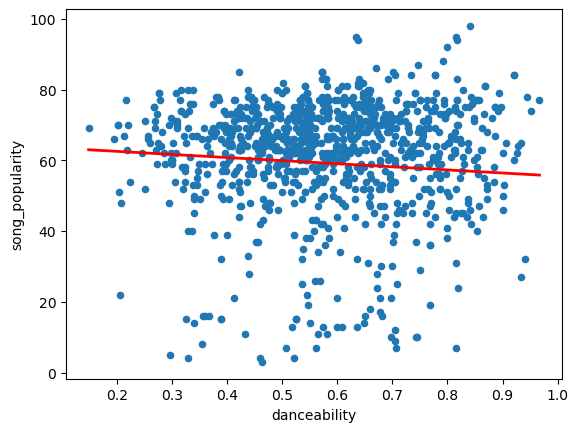

In [350]:

# first, plot the observed data
data.plot(kind='scatter', x='danceability', y='song_popularity')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

# Confidence in our model

The confidence interval for the model provides a range of values around the estimated coefficients, indicating the precision of the coefficient estimates. It gives us a sense of how confident we can be that the true population parameter lies within that range.

For example, if the confidence interval for a coefficient is [0.5, 1.2], it means that we are 95% confident that the true value of the coefficient lies between 0.5 and 1.2. The narrower the confidence interval, the more precise the coefficient estimate.

Here, the confidence interval for each coefficient (e.g., danceability) will provide information about the precision of the estimated relationship between the independent variable (danceability) and the dependent variable (song popularity).

In [351]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='song_popularity ~ danceability ', data=data).fit()
lm.conf_int()

,0,1
Intercept,57.065533,64.547285
danceability,-4.478196,7.990229


# Hypothesis Testing and p-values

Hypothesis testing in machine learning is a statistical method for determining whether a particular hypothesis about a dataset is likely to be true or not. It involves formulating a null hypothesis (usually that there is no significant relationship between variables), collecting data, and then using a statistical test to calculate a p-value, which measures the strength of evidence against the null hypothesis.

We Formulate the Hypotheses as:

Null hypothesis (H0): The default assumption, often stating that there's no significant relationship or difference between variables.
Alternative hypothesis (Ha): The hypothesis you're aiming to support, often stating that there is a significant relationship or difference.

If the p-value is below a predetermined significance level (e.g., 0.05), reject the null hypothesis and accept the alternative hypothesis.
If the p-value is above the significance level, fail to reject the null hypothesis.

__To test our regression model let us assume:
Null hypothesis (H0): There is no significant linear relationship between song popularity and danceability. (Coefficient of song_popularity is 0.)
Alternative hypothesis (Ha): There is a significant linear relationship between song popularity and danceability. (Coefficient of song_popularity is not 0.)__

In [352]:
lm.pvalues

Intercept       1.727774e-154
danceability     5.805643e-01
dtype: float64

In [353]:
value=5.805643e-01
if value < 0.05:
    print("The value is less than 0.05")
else:
    print("The value is not less than 0.05")

The value is not less than 0.05


Here p-value is not less than 0.05. Therefore we accept H0 that there is no significant linear relationship between song_popularity and danceability.

# How Well Does the Model Fit Data?

In machine learning, R-squared (R², or the coefficient of determination) is a statistical measure that tells you how well your model explains the changes you observe in the dependent variable based on the changes in the independent variables. It essentially represents the proportion of the variance in the dependent variable that's explained by the model.

R-squared values range from 0 to 1 (0% to 100%).

0: The model explains none of the variance in the dependent variable.
0.5: The model explains half of the variance.
1: The model explains all of the variance (which is rarely the case in real-world scenarios).

To evaluate the overall fit of our linear model lets calculate the R-squared value

In [354]:
#This value can be used to compare different models
lm.rsquared 

0.00030604167977121843

_Lets further create models to check the effects of song_duration,energy,liveness on song popularity induvidually. We will follow the same procedure of setting up linear regression model,prediction followed by confidence and hypothesis testing and at last compare their R-squared values._


__1) Simple Linear Regression Model for song_duration x song popularity__


In [355]:
# create X and y
feature_cols = ['song_duration_ms']
X = data[feature_cols]
y = data.song_popularity

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

62.2380419756937
[-1.67352658e-06]


__Interpretation__ A one-unit increase in song_duration is associated with a 1.6735 unit deccrease in song popularity.
In other words, for every increase of 1 unit in song_duration, the song popularity is expected to decrease by 1.6735 units.

In [356]:
#Using Model for Prediction
62.2380419756937+-1.67352658e-06*159645 #manually calculation prediction for song_duration= 159645 ms song

61.9708718248296

In [357]:
#Using model to predict song popularity for a song_duration= 159645 ms song
X_new = pd.DataFrame({'song_duration_ms': [159645]})
X_new.head()
lm.predict(X_new)

array([61.97087182])

C:\Users\Sireesha\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


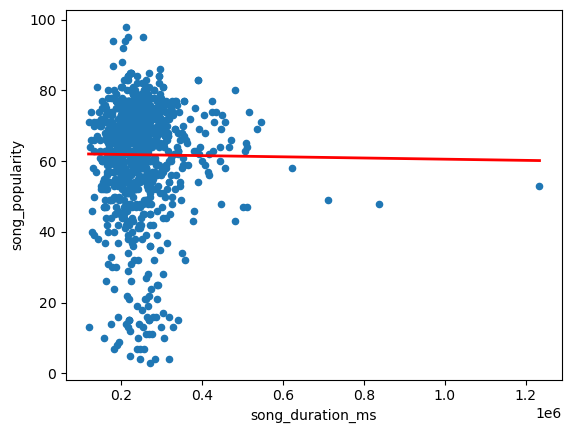

In [358]:
#Plotting Least Squares Line
X_new = pd.DataFrame({'song_duration_ms': [data.song_duration_ms.min(), data.song_duration_ms.max()]})
X_new.head()
X_new=X_new.to_numpy() #Converting from data frame to numpy array for plotting
X_new
preds = lm.predict(X_new)
preds
# first, plot the observed data
data.plot(kind='scatter', x='song_duration_ms', y='song_popularity')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [360]:
#checking confidence intervals
import statsmodels.formula.api as smf
lm = smf.ols(formula='song_popularity ~ song_duration_ms ', data=data).fit()
lm.conf_int()

,0,1
Intercept,58.831122,65.644962
song_duration_ms,-0.000015,0.000011


__Hypothesis testing__
H0: There is no significant linear relationship between song popularity and song_duration. 
Ha: There is a significant linear relationship between song popularity and song_duration. 


In [361]:
lm.pvalues

Intercept           1.543825e-181
song_duration_ms     8.028657e-01
dtype: float64

In [362]:
value=8.028657e-01
if value < 0.05:
    print("The value is less than 0.05")
else:
    print("The value is not less than 0.05")

The value is not less than 0.05


Here p-value is not less than 0.05. Therefore we accept H0 that there is no significant linear relationship between song_popularity and song_duration.

In [363]:
#This value can be used to compare different models
lm.rsquared 

6.247442674089942e-05

__2) Simple Linear Regression Model for song_duration x energy__

In [364]:
# create X and y
feature_cols = ['energy']
X = data[feature_cols]
y = data.song_popularity

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

61.10545046021315
[1.05108497]


__Interpretation__: A one-unit increase in energy is associated with a 1.051 unit increase in song popularity. In other words, for every increase of 1 unit in energy, the song popularity is expected to increases by 1.051 units.

In [365]:
61.10545046021315+1.05108497*0.5 #manually calculation prediction for enrgy=0.5 song

61.63099294521315

In [366]:
#Using model to predict song popularity for a song_duration= 159645 ms song
X_new = pd.DataFrame({'energy': [0.5]})
X_new.head()
lm.predict(X_new)

array([61.63099295])

C:\Users\Sireesha\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


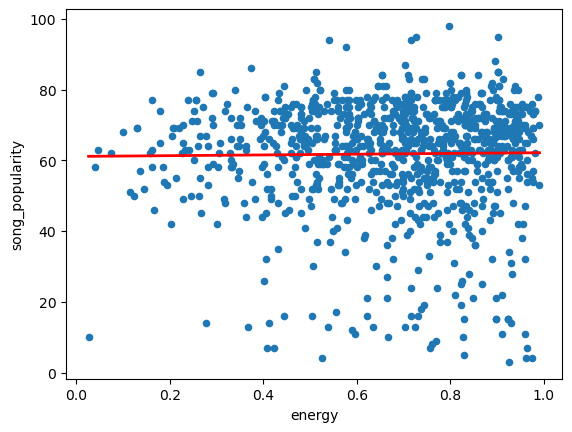

In [367]:
#Plotting Least Squares Line
X_new = pd.DataFrame({'energy': [data.energy.min(), data.energy.max()]})
X_new.head()
X_new=X_new.to_numpy() #Converting from data frame to numpy array for plotting
X_new
preds = lm.predict(X_new)
preds
# first, plot the observed data
data.plot(kind='scatter', x='energy', y='song_popularity')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [368]:
#checking confidence intervals
import statsmodels.formula.api as smf
lm = smf.ols(formula='song_popularity ~ energy ', data=data).fit()
lm.conf_int()

,0,1
Intercept,57.694415,64.516486
energy,-3.732984,5.835154


__Hypothesis testing__
H0: There is no significant linear relationship between song popularity and energy.
Ha: There is a significant linear relationship between song popularity and energy.

In [369]:
lm.pvalues

Intercept    8.440940e-177
energy        6.664617e-01
dtype: float64

In [370]:
value=6.664617e-01
if value < 0.05:
    print("The value is less than 0.05")
else:
    print("The value is not less than 0.05")

The value is not less than 0.05


Here p-value is not less than 0.05. Therefore we accept H0 that there is no significant linear relationship between song_popularity and energy.

In [371]:
#This value can be used to compare different models
lm.rsquared 

0.0001862171430480064

__3) Simple Linear Regression Model for song_duration x liveness__

In [372]:
# create X and y
feature_cols = ['liveness']
X = data[feature_cols]
y = data.song_popularity

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

63.148378943810066
[-7.42102615]


__Interpretation__: A one-unit increase in liveness is associated with a 7.421 unit decrease in song popularity. In other words, for every increase of 1 unit in liveness, the song popularity is expected to decrease by 7.421 units.

In [373]:
63.148378943810066+-7.421026157*0.122 #manually calculation prediction for liveness=0.122 song

62.24301375265607

In [374]:
#Using model to predict song popularity for a song_duration= 159645 ms song
X_new = pd.DataFrame({'liveness': [0.122]})
X_new.head()
lm.predict(X_new)

array([62.24301375])

C:\Users\Sireesha\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


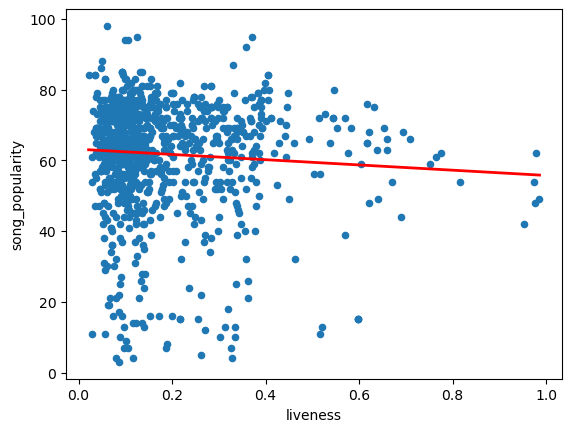

In [375]:
#Plotting Least Squares Line
X_new = pd.DataFrame({'liveness': [data.liveness.min(), data.liveness.max()]})
X_new.head()
X_new=X_new.to_numpy() #Converting from data frame to numpy array for plotting
X_new
preds = lm.predict(X_new)
preds
# first, plot the observed data
data.plot(kind='scatter', x='liveness', y='song_popularity')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [376]:
#checking confidence intervals
import statsmodels.formula.api as smf
lm = smf.ols(formula='song_popularity ~ liveness', data=data).fit()
lm.conf_int()

,0,1
Intercept,61.584673,64.712084
liveness,-14.234492,-0.607560


__Hypothesis testing__
H0: There is no significant linear relationship between song popularity and liveness.
Ha: There is a significant linear relationship between song popularity and liveness.

In [377]:
lm.pvalues

Intercept    0.000000
liveness     0.032814
dtype: float64

In [378]:
value=0.032814
if value < 0.05:
    print("The value is less than 0.05")
else:
    print("The value is not less than 0.05")

The value is less than 0.05


Here p-value less than 0.05. Therefore we reject H0 and accept Ha that there is significant linear relationship between song_popularity and liveness.

In [379]:
#This value can be used to compare different models
lm.rsquared 

0.0045564653491363405

__Here we deduce that none of the three factors(danceability,song_duration,energy) have significant imapct on song popularity induvidually but Liveness does have an impact. Thus prediction of popularity based on Liveness is a better model to consider___

# Multiple Linear Regression

Multiple linear regression to model the relationship between a continuous dependent variable and two or more independent variables. It's like trying to find the best-fitting hyperplane, instead of a line, that goes through a bunch of data points in higher dimensions.Unlike simple linear regression which uses only one independent variable, multiple linear regression allows you to consider the influence of several factors on the dependent variable. The model assumes a linear relationship between the independent variables and their combined effect on the dependent variable. This means the change in the dependent variable is proportional to the weighted sum of the changes in the independent variables.

Similar to simple linear regression, it's represented by an equation like $y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n + ε$  where:

y is the dependent variable.
x1, x2, ..., xn are the independent variables.
b0 is the intercept (the value of y when all independent variables are zero).
b1, b2, ..., bn are the coefficients (slopes) representing the individual effects of each independent variable on y.
ε is the error term (representing the unexplained variance).

For our model:
$y = \beta_0 + \beta_1 \times song duration + \beta_2 \times danceability + \beta_3 \times energy +\beta_3 \times instrumentalness + \beta_3 \times liveness$

In [380]:
# create X and y
feature_cols = ['song_duration_ms','danceability','energy','instrumentalness','liveness']
X = data[feature_cols]
y = data.song_popularity

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

61.727280918515945
[-4.78837052e-07  1.05071226e+00  1.91528400e+00 -9.60599975e+00
 -7.71770707e+00]


Interpretation:

The intercept represents the estimated song popularity when all other features are zero.
A one-unit increase in danceability is associated with a 1.051 unit increase in song popularity, holding other variables constant.
A one-unit increase in energy is associated with a 1.915 unit increase in song popularity, holding other variables constant.
A one-unit increase in instrumentalness is associated with a 9.606 unit decrease in song popularity, holding other variables constant.
A one-unit increase in liveness is associated with a 7.718 unit decrease in song popularity, holding other variables constant.

Lets review piece-by-piece in model summary output

In [381]:
lm = smf.ols(formula='song_popularity ~ danceability + energy + instrumentalness + liveness', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        song_popularity   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.722
Date:                Thu, 18 Jan 2024   Prob (F-statistic):             0.0284
Time:                        19:44:51   Log-Likelihood:                -4176.4
No. Observations:                1000   AIC:                             8363.
Df Residuals:                     995   BIC:                             8387.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           61.5809      2.653     23.208      0.000      56.374      66.788
danceability         1.0888      3.187      0.342      0.733      -5.165       7.342
energy               1.9245      2.461      0.782      0.434      -2.905       6.754
instrumentalness    -9.6108      4.071     -2.361      0.018     -17.600      -1.622
liveness            -7.7207      3.529     -2.188      0.029     -14.647      -0.795
==============================================================================
Omnibus:                      271.013   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              624.155
Skew:                          -1.471   Prob(JB):                    2.93e-136
Kurtosis:                       5.514   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept is 61.5809, indicating the estimated song popularity when all other features are zero.

Danceability and energy have p-values greater than 0.05, suggesting that they are not statistically significant. However, instrumentalness and liveness have p-values less than 0.05, indicating that they are statistically significant.

We fail to reject the null hypothesis for danceability and energy, suggesting that there is no association between those features and song popularity. However, we reject the null hypothesis for instrumentalness and liveness, indicating that they are associated with song popularity.

Instrumentalness is negatively associated with song popularity, while liveness is also negatively associated with song popularity.



__Comaprison parameters calculation__

To compare linear regression models we will use:

Coefficient of Determination (R-squared): This metric measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R-squared value indicates a better fit.

Mean Squared Error (MSE): This metric measures the average of the squares of the errors or deviations. A lower MSE indicates a better fit.

Mean Absolute Error (MAE): This metric measures the average of the absolute errors between the actual and predicted values. A lower MAE indicates a better fit.

Root Mean Squared Error (RMSE): This metric measures the square root of the average of the squared differences between the actual and predicted values. A lower RMSE indicates a better fit.

Adjusted R-squared: This metric is a modified version of R-squared that adjusts for the number of predictors in the model. It is useful for comparing models with different numbers of predictors.

At the end we will choose a linear regression models by examining these metrics and selecting the model with the higher R-squared value, lower MSE, lower MAE, and lower RMSE

In [382]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error

# Use the model to make predictions
y_pred = lm.predict(X)

# Calculate the mean squared error
mse1 = mean_squared_error(y, y_pred)
print("MSE:",mse1)

# Calculate the mean absolute error
mae1 = mean_absolute_error(y, y_pred)
print("MAE:", mae1)

# Calculate the root mean squared error
rmse1 = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse1)

rs1=lm.rsquared 
print("RS:", rs1)


MSE: 248.3681515557135
MAE: 11.519539711788452
RMSE: 15.7597002368609
RS: 0.010823076575669943


# Feature Selection

Now to fine tune our model, we will drop features with highest p-values and keep monitoring rsquared values to get the most efficient one. As we can see in the summary, danceability has the highest p-value. So lets drop that feature.

__1)Without danceability__

In [383]:
# create X and y
feature_cols = ['song_duration_ms','energy','instrumentalness','liveness']
X = data[feature_cols]
y = data.song_popularity

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

62.47184562848993
[-8.46248288e-07  1.87923438e+00 -9.60608790e+00 -7.83279626e+00]


In [384]:
lm = smf.ols(formula='song_popularity ~  song_duration_ms+energy + instrumentalness + liveness', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        song_popularity   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.696
Date:                Thu, 18 Jan 2024   Prob (F-statistic):             0.0297
Time:                        19:44:55   Log-Likelihood:                -4176.4
No. Observations:                1000   AIC:                             8363.
Df Residuals:                     995   BIC:                             8387.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           62.4718      2.468     25.313      0.000      57.629      67.315
song_duration_ms -8.462e-07   6.69e-06     -0.127      0.899    -1.4e-05    1.23e-05
energy               1.8792      2.462      0.763      0.445      -2.952       6.711
instrumentalness    -9.6061      4.072     -2.359      0.019     -17.596      -1.616
liveness            -7.8328      3.512     -2.230      0.026     -14.725      -0.941
==============================================================================
Omnibus:                      271.037   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              625.784
Skew:                          -1.470   Prob(JB):                    1.30e-136
Kurtosis:                       5.525   Cond. No.                     2.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [385]:
#Comaprison parameters calculation

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error

# Use the model to make predictions
y_pred = lm.predict(X)

# Calculate the mean squared error
mse2 = mean_squared_error(y, y_pred)
print("MSE:",mse2)

# Calculate the mean absolute error
mae2 = mean_absolute_error(y, y_pred)
print("MAE:", mae2)

# Calculate the root mean squared error
rmse2 = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse2)

rs2=lm.rsquared 
print("RS:", rs2)


MSE: 248.3932897511557
MAE: 11.510493028730844
RMSE: 15.760497763432337
RS: 0.010722958574742147


We can further remove song_duration as it still has more p-value.

__2)Without danceability & song_duration__

In [386]:
# create X and y
feature_cols = ['energy','instrumentalness','liveness']
X = data[feature_cols]
y = data.song_popularity

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

62.254798550865665
[ 1.89359851 -9.61489379 -7.84587711]


In [387]:
lm = smf.ols(formula='song_popularity ~ energy + instrumentalness + liveness', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        song_popularity   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.593
Date:                Thu, 18 Jan 2024   Prob (F-statistic):             0.0133
Time:                        19:44:56   Log-Likelihood:                -4176.5
No. Observations:                1000   AIC:                             8361.
Df Residuals:                     996   BIC:                             8381.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           62.2548      1.774     35.091      0.000      58.773      65.736
energy               1.8936      2.458      0.770      0.441      -2.930       6.718
instrumentalness    -9.6149      4.069     -2.363      0.018     -17.600      -1.630
liveness            -7.8459      3.509     -2.236      0.026     -14.731      -0.961
==============================================================================
Omnibus:                      270.978   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              625.625
Skew:                          -1.470   Prob(JB):                    1.40e-136
Kurtosis:                       5.525   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [388]:
#Comaprison parameters calculation

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error

# Use the model to make predictions
y_pred = lm.predict(X)

# Calculate the mean squared error
mse3 = mean_squared_error(y, y_pred)
print("MSE:",mse3)

# Calculate the mean absolute error
mae3 = mean_absolute_error(y, y_pred)
print("MAE:", mae3)

# Calculate the root mean squared error
rmse3 = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse3)

rs3=lm.rsquared 
print("RS:", rs3)

MSE: 248.3972890434116
MAE: 11.511027973998763
RMSE: 15.760624640013846
RS: 0.010707030575983656


Finally we can remove energy to fine tune the model.

__3)Without danceability,song_duration & energy__

In [389]:
# create X and y
feature_cols = ['instrumentalness','liveness']
X = data[feature_cols]
y = data.song_popularity

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

63.471852148162554
[-9.62837809 -7.41971115]


In [390]:
lm = smf.ols(formula='song_popularity ~  + instrumentalness + liveness', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        song_popularity   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     5.095
Date:                Thu, 18 Jan 2024   Prob (F-statistic):            0.00629
Time:                        19:44:58   Log-Likelihood:                -4176.8
No. Observations:                1000   AIC:                             8360.
Df Residuals:                     997   BIC:                             8374.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           63.4719      0.807     78.682      0.000      61.889      65.055
instrumentalness    -9.6284      4.068     -2.367      0.018     -17.612      -1.645
liveness            -7.4197      3.464     -2.142      0.032     -14.218      -0.622
==============================================================================
Omnibus:                      268.752   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              615.926
Skew:                          -1.461   Prob(JB):                    1.79e-134
Kurtosis:                       5.498   Cond. No.                         8.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [391]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error

# Use the model to make predictions
y_pred = lm.predict(X)

# Calculate the mean squared error
mse4 = mean_squared_error(y, y_pred)
print("MSE:",mse4)

# Calculate the mean absolute error
mae4 = mean_absolute_error(y, y_pred)
print("MAE:", mae4)

# Calculate the root mean squared error
rmse4 = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse4)

rs4=lm.rsquared 
print("RS:", rs4)

MSE: 248.54526795715978
MAE: 11.534496372016747
RMSE: 15.765318517466108
RS: 0.010117674309021885


# Result Analysis


Let us compare the parameter values of all the models we have built till now.

In [392]:
data={
    'Regression Model name':['All features','Without danceability','Without danceability & energy','Without danceability,song_duration & energy'],
    'Independent variables chosen':['song_duration_ms,danceability,energy,instrumentalness,liveness','song_duration_ms,energy,instrumentalness,liveness','song_duration_ms,instrumentalness,liveness','instrumentalness,liveness'],
    'MSE':[mse1,mse2,mse3,mse4],
    'MAE':[mae1,mae2,mae3,mae4],
    'RMSE':[rmse1,rmse2,rmse3,rmse4],
    'R-Square':[rs1,rs2,rs3,rs4]
}

df=pd.DataFrame(data)
df=df.reset_index()
df=df.rename(columns={'index':'S. No'})
df['S. No']=df['S. No']+1
df=df.set_index('S. No')
df

,Regression Model name,Independent variables chosen,MSE,MAE,RMSE,R-Square
S. No,,,,,,
1,All features,"song_duration_ms,danceability,energy,instrumen...",248.368152,11.519540,15.759700,0.010823
2,Without danceability,"song_duration_ms,energy,instrumentalness,liveness",248.393290,11.510493,15.760498,0.010723
3,Without danceability & energy,"song_duration_ms,instrumentalness,liveness",248.397289,11.511028,15.760625,0.010707
4,"Without danceability,song_duration & energy","instrumentalness,liveness",248.545268,11.534496,15.765319,0.010118


# Conclusion

Looking at this table, we can come to a conclusion that after dropping dancebility we get the most accurate predictions. This because model number 2 has high R-Square value but low MSE,MAE and RMSE values.The coefficents of
song_duration_ms,energy,instrumentalness,livenes are as follows-:  -8.46248288e-07,  1.87923438e+00, -9.60608790e+00,-7.83279626e+00. Thus we can coclude that increase in song_duration,instrumentalness and liveness reduces song popularity while increase in energy increases the popularity.

# References
1)https://www.geeksforgeeks.org/python-mean-squared-error/
2)https://www.investopedia.com/terms/c/confidenceinterval.asp
3)https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-linear-regression/
4)https://www.kaggle.com/datasets/yasserh/song-popularity-dataset